<a href="https://colab.research.google.com/github/ashu433/Machine-Learning-Book-Practice-Q-A/blob/main/chapter_3_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [ ]:
mnist=fetch_openml('mnist_784',version=1)
type(mnist)

sklearn.utils._bunch.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
X,Y=mnist['data'],mnist['target']

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

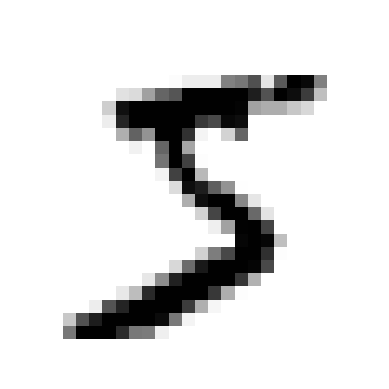

In [ ]:
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

# **Binary Class Classification Problem**

In [ ]:
Y_train_5=Y_train.to_numpy()=="5"
Y_test_5=Y_test.to_numpy()=="5"

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
X_train=X_train.to_numpy()

In [ ]:
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,Y_train_5)

SGDClassifier()

In [ ]:
sgd_clf.predict([some_digit])

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_clf,X_train,Y_train_5,cv=5,scoring="accuracy")

array([0.96858333, 0.96691667, 0.95308333, 0.95741667, 0.94533333])

# **Strastified K Fold Splitting**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
skfold=StratifiedKFold(n_splits=3)

for train_index,test_index in skfold.split(X_train,Y_train_5):
  sgd_clf_cloned=clone(sgd_clf)
  X_train_folds=X_train[train_index]
  Y_train_fold=Y_train_5[train_index]
  X_test_fold=X_train[test_index]
  Y_test_5_fold=Y_train_5[test_index]

  sgd_clf_cloned.fit(X_train_folds,Y_train_fold)
  Y_predict_5=sgd_clf_cloned.predict(X_test_fold)
  n_correct = sum(Y_predict_5 == Y_test_5_fold)

  print(n_correct/len(Y_predict_5))

0.9572
0.9644
0.9638


# **Confusion Matrix**

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
Y_train_predict_5=cross_val_predict(sgd_clf,X_train,Y_train_5,cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_train_5,Y_train_predict_5)

array([[52738,  1841],
       [  892,  4529]])

In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
precision_score(Y_train_5,Y_train_predict_5)

0.710989010989011

In [ ]:
recall_score(Y_train_5,Y_train_predict_5)

0.8354547131525549

In [ ]:
f1_score(Y_train_5,Y_train_predict_5)

0.768213043847002

In [ ]:
sgd_clf.decision_function([some_digit])

array([-846.1468454])

In [ ]:
Y_scores = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=3,method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(Y_train_5, Y_scores)

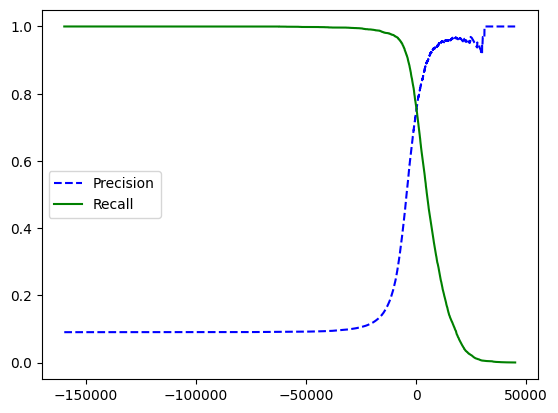

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train_5, Y_scores)

Text(0, 0.5, 'TPR')

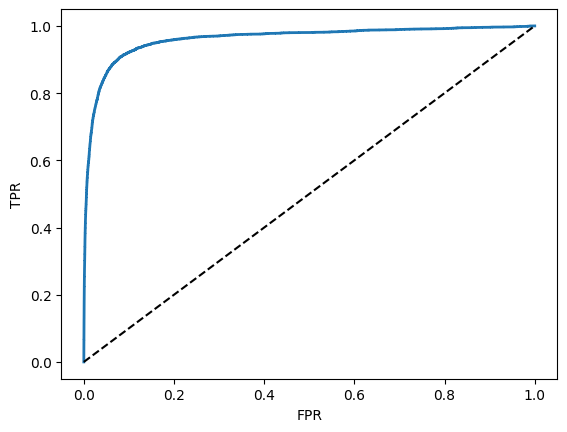

In [ ]:
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rnd_forest_clf=RandomForestClassifier()
Y_scores_RF=cross_val_predict(rnd_forest_clf,X_train,Y_train_5,cv=5, method="predict_proba")

In [ ]:
Y_scores_RF=Y_scores_RF[:,1]

In [ ]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train_5, Y_scores_RF)

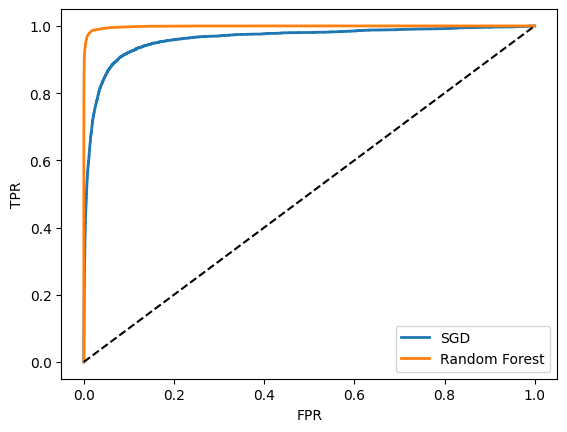

In [ ]:
plt.plot(fpr, tpr, linewidth=2,label="SGD")
plt.plot(fpr_forest, tpr_forest, linewidth=2,label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# **Multi Class Classification Problem**

In [ ]:
mnist=fetch_openml('mnist_784',version=1)

In [ ]:
X,Y=mnist['data'],mnist['target']

In [ ]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [ ]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
Y_train=Y_train.to_numpy()
Y_test=Y_test.to_numpy()

In [ ]:
some_digit = X.iloc[0].to_numpy()

In [ ]:
from sklearn.svm import SVC

svc_clf=SVC()
svc_clf.fit(X_train,Y_train)

SVC()

In [ ]:
svc_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
svc_clf.decision_function([some_digit])

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,Y_train)

SGDClassifier()

In [ ]:
sgd_clf.decision_function([some_digit])

array([[-14024.12825172, -26163.93857748,  -6232.32596702,
         -1256.60074045, -18729.59777168,   5286.91377332,
        -27832.84931442, -14164.59129371,  -9780.85308182,
         -9517.39924973]])

In [ ]:
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
cross_val_score(sgd_clf, X_train, Y_train, cv=3, scoring="accuracy")

array([0.8649 , 0.8724 , 0.88935])

In [ ]:
Scaling=StandardScaler()
X_trained_scaled=Scaling.fit_transform(X_train.astype(np.float64))

In [ ]:
cross_val_score(sgd_clf, X_trained_scaled, Y_train, cv=3, scoring="accuracy")

array([0.89935, 0.893  , 0.89765])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_trained_scaled, Y_train, cv=3)

In [ ]:
conf_mx = confusion_matrix(Y_train,y_train_pred)
conf_mx

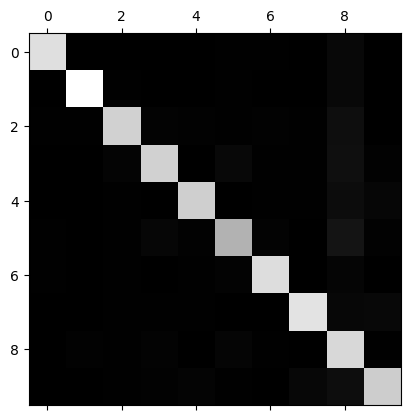

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# **Multi Label Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
Y_train=Y_train.astype(float)

In [ ]:
Y_train_greater_than_6=(Y_train>=6)
Y_train_odd=(Y_train%2==1)

In [ ]:
Y_multilabel=np.c_[Y_train_greater_than_6,Y_train_odd]

In [ ]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,Y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
y_train_predict_knn=cross_val_predict(knn_clf,X_train,Y_multilabel,cv=3)

In [ ]:
f1_score(Y_multilabel,y_train_predict_knn,average="macro")

# **Multi Output Classification**

In [ ]:
noise=np.random.randint(0,100,(len(X_train),784))
X_train_modified=X_train+noise
noise=np.random.randint(0,100,(len(X_test),784))
X_test_modified=X_test+noise

In [ ]:
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
some_digit = X_train_modified[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

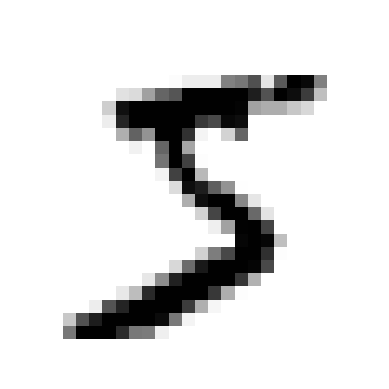

In [ ]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
knn_clf.fit(X_train_modified,y_train_mod)

KNeighborsClassifier()

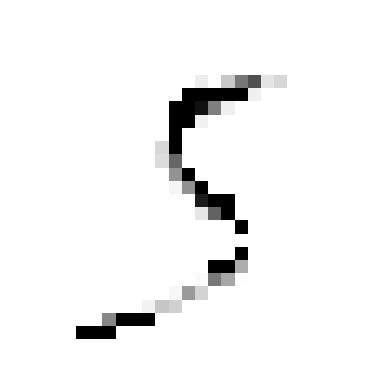

In [ ]:
clean_digit = knn_clf.predict([some_digit])
some_digit_image = clean_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()